# Homework 1 - Diagnostic

CAPP 30254 Machine Learning for Public Policy

Jonathan Tan

April 9, 2019

## Problem 1: Data Acquisition and Analysis

#### 1. Download reported crime data from the Chicago open data portal for 2017 and 2018.

Given the large volume of crime data (over 500,000 rows), the data was downloaded via the Socrata Open Data API and stored in `/data/crime.csv`. The script to replicate this can be found in `/scripts/data-assembly.py`.

#### 2. Generate summary statistics for the crime reports data including but not limited to number of crimes of each type, how they change over time, and how they are different by neighborhood. Please use a combination of tables and graphs to present these summary stats.

In [2]:
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
crime_df = pd.read_csv("data/crime.csv")
crime_df = crime_df.rename({'Unnamed: 0': 'index'}, axis='columns')

# Check that data is formatted properly
crime_df.head()

,index,arrest,beat,block,case_number,community_area,date,description,district,domestic,...,latitude,location,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
0,0,True,1034,026XX S CALIFORNIA BLVD,JA529032,30.0,2017-11-28T21:43:00.000,VIOLENT OFFENDER: ANNUAL REGISTRATION,10.0,False,...,41.843778,"{'type': 'Point', 'coordinates': [-87.69463767...",JAIL / LOCK-UP FACILITY,-87.694638,OTHER OFFENSE,2018-02-11T15:54:58.000,12.0,1158280.0,1886310.0,2017
1,1,True,1221,007XX N SACRAMENTO BLVD,JA545986,23.0,2017-12-11T19:15:00.000,ARMED: HANDGUN,12.0,False,...,41.894476,"{'type': 'Point', 'coordinates': [-87.70216915...",SIDEWALK,-87.702169,ROBBERY,2018-02-11T15:54:58.000,27.0,1156092.0,1904769.0,2017
2,2,False,2222,092XX S RACINE AVE,JB147188,73.0,2017-10-08T03:00:00.000,NON-AGGRAVATED,22.0,False,...,NaN,NaN,RESIDENCE,NaN,CRIM SEXUAL ASSAULT,2018-02-11T15:57:41.000,21.0,NaN,NaN,2017
3,3,False,835,026XX W 79TH ST,JB147595,70.0,2017-03-28T14:00:00.000,UNLAWFUL ENTRY,8.0,False,...,NaN,NaN,OTHER,NaN,BURGLARY,2018-02-11T15:57:41.000,18.0,NaN,NaN,2017
4,4,False,313,060XX S EBERHART AVE,JB147230,42.0,2017-09-09T20:17:00.000,OVER $500,3.0,False,...,NaN,NaN,RESIDENCE,NaN,THEFT,2018-02-11T15:57:41.000,20.0,NaN,NaN,2017


### 1.1 How often is each crime reported in the data?

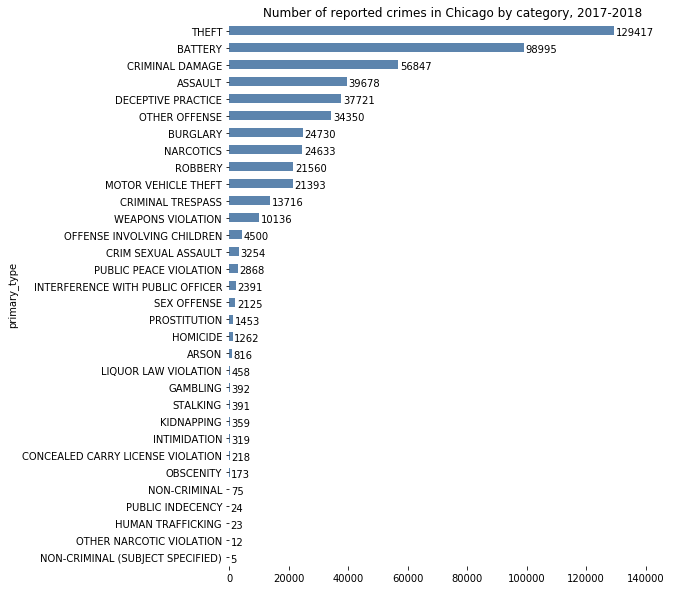

In [3]:
# Group by primary_type, count number of rows in each, then sort in ascending order
crime_by_type = crime_df \
    .groupby(['primary_type'])[['index']] \
    .count() \
    .rename({'index': 'count'}, axis='columns') \
    .sort_values(by='count')

# plot results
ax1 = crime_by_type.plot.barh(title='Number of reported crimes in Chicago by category, 2017-2018',
                             legend=False,
                             figsize=(8, 10),
                             xlim=(0, 150000),
                             color=(0.2, 0.4, 0.6, 0.8))

# add bar labels
# Code adapted from https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
for p in ax1.patches:
    ax1.annotate(str(p.get_width()),
                 (p.get_width() + 500, p.get_y()))

# remove border 
# Code adapted from https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame
for edge in ('top', 'right', 'bottom', 'left'):
    ax1.spines[edge].set_visible(False)

The most-commonly reported category of crimes is "THEFT", while the least commonly reported category of crime is "NON-CRIMINAL (SUBJECT SPECIFIED)".

### 1.2 How have reports for each crime changed between 2017 and 2018?

In [4]:
crime_df.groupby(['year']).size()

year
2017    268088
2018    266206
dtype: int64

In [5]:
crime_df.groupby(['year']).size().pct_change()

year
2017        NaN
2018   -0.00702
dtype: float64

The total number of reported crimes stayed relatively stable between 2017 and 2018, falling slightly by 0.7%.

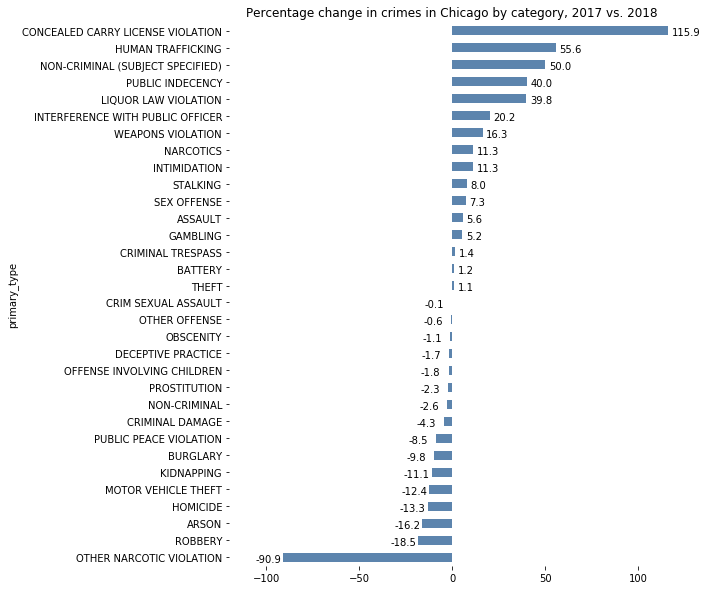

In [6]:
# Group by primary_type and year, count the number of rows in each type-year, 
#  calculate the percentage change from 2017 to 2018 for each year, 
pct_change_df = crime_df \
    .groupby(['primary_type', 'year'])[['index']] \
    .count() \
    .pct_change() \
    .reset_index()

# Filter to only show 2018 values, then sort by value
pct_change_df = pct_change_df \
    .loc[pct_change_df.year == 2018] \
    .sort_values(by='index') \
    .rename({'index': 'pct_change'}, axis='columns')

# Adjust units to show in percentage instead of decimal
pct_change_df['pct_change'] *= 100

# plot
ax2 = pct_change_df.plot.barh(x='primary_type',
                              y='pct_change',
                              title='Percentage change in crimes in Chicago by category, 2017 vs. 2018',
                              legend=False,
                              figsize=(8, 10), 
                              xlim=(-120, 120),
                              color=(0.2, 0.4, 0.6, 0.8))

# add bar labels
for p in ax2.patches:
    if p.get_width() > 0:
        ax2.annotate(str(round(p.get_width(), 1)),
                     (p.get_width() + 2, p.get_y()))
    else:
        ax2.annotate(str(round(p.get_width(), 1)),
                     (p.get_width() - 15, p.get_y()))
    
# remove border 
for edge in ('top', 'right', 'bottom', 'left'):
    ax2.spines[edge].set_visible(False)

The category of crime that has seen the largest percentage increase between 2017 and 2018 is "CONCEALED CARRY LICENSE VIOLATION" (+116%), while the category that has seen the largest percentage decrease is "OTHER NARCOTIC VIOLATION" (-91%).

Additionally, reports of theft - the most common category of crime overall - stayed relatively stable and only increased by 1.1%. 

### 1.3 How do crimes differ by neighborhood?

In [7]:
# Count number of reported crimes by community_area
crime_by_area = crime_df \
    .groupby(['community_area']) \
    .size() \
    .reset_index() \
    .rename({0: 'count'}, axis='columns')

# change ID for community_area from float to int to string for merging
crime_by_area.community_area = crime_by_area.community_area.astype(int).astype(str)
crime_by_area.sort_values(by='count', ascending=False).head()

,community_area,count
25,25,30424
8,8,25365
32,32,21479
28,28,18446
29,29,18373


There are 77 community areas in Chicago, so a table isn't particularly effective here at showing patterns (if any) by area. Instead, we'll get a basemap of Chicago from the Chicago Open Data Portal to plot our data against.

In [8]:
# First, get Chicago basemap
import requests
import geopandas as gpd
from geopandas.plotting import plot_dataframe
import descartes  # to plot polygons in geopandas
import shapely # to work directly with geometric objects

CHICAGO_URL = 'https://data.cityofchicago.org/resource/igwz-8jzy.geojson'
chicago_gjson = requests.get(CHICAGO_URL).json()
chicago_gdf = gpd.GeoDataFrame.from_features(chicago_gjson)

Next, we'll take the counts of reported crime from above and merge it onto the neighborhood data so we can plot it.

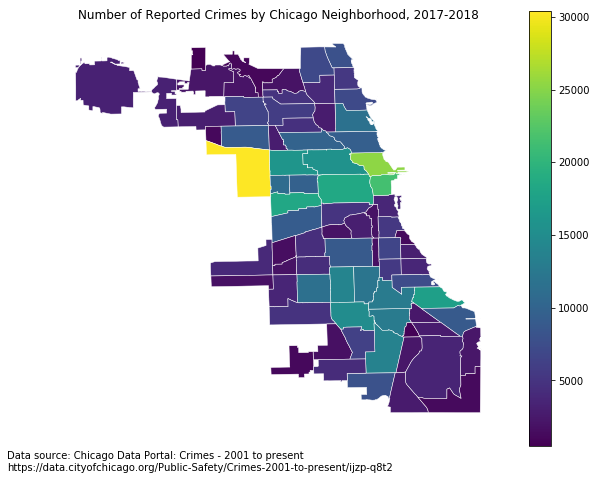

In [9]:
# Merge count of reported crime onto each community area
crime_gdf = chicago_gdf.merge(crime_by_area,
                              how='inner',
                              left_on='area_num_1', right_on='community_area')

# Plot the map
ax3 = crime_gdf.plot(edgecolor='white',
                     linewidth=0.5,
                     column='count', 
                     figsize=(10, 8),
                     legend=True)

# Some visual tweaks
plt.title('Number of Reported Crimes by Chicago Neighborhood, 2017-2018')
plt.axis('off')
plt.text(-88.01, 41.585, 
         "Data source: Chicago Data Portal: Crimes - 2001 to present \nhttps://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2")
plt.show()

From the map, we can tell that the total number of reported crimes between 2017 and 2018 was highest in Austin, followed by the Near North Side and the Loop. 

What about neighborhood patterns for specific kinds of crimes? In what neighborhood is each crime reported most often?

In [10]:
crimes_by_cat_df = crime_df \
    .groupby(['primary_type', 'community_area']) \
    .size() \
    .reset_index() \
    .rename({0: 'count'}, axis='columns')

# Code to filter by category with largest value adapted from
# https://stackoverflow.com/questions/32459325/python-pandas-dataframe-select-row-by-max-value-in-group/32459442
crimes_by_cat_df.loc[crimes_by_cat_df.groupby(['primary_type'])['count'].idxmax()] \
    .sort_values(by=['community_area', 'count'], ascending=[True, False]) \
    .set_index(keys='community_area')

,primary_type,count
community_area,,
8.0,THEFT,12022
8.0,DECEPTIVE PRACTICE,3815
8.0,CRIMINAL TRESPASS,711
8.0,LIQUOR LAW VIOLATION,48
8.0,STALKING,28
8.0,INTIMIDATION,18
8.0,PUBLIC INDECENCY,4
23.0,GAMBLING,56
23.0,NON-CRIMINAL (SUBJECT SPECIFIED),2


It appears that Austin (community area 25) is the neighborhood with the most reports for most crimes, with the exception of:
- Near North Side (#8) for reports of theft, deceptive practice, criminal trespass, liquor law violation, stalking, intimidation, and public indecency
- Humbolt Park (#23) for gambling
- West Town (#24) for burglary
- North Lawndale (#29) for narcotics
- the Loop (#32) for other narcotic violations
- South Shore (#43) for obsenity
- O'Hare (#76) for concealed carry licence violations and other unspecified non-criminal activities.

We can further illustrate this by mapping out the frequency of reports of each crime by neighborhood:

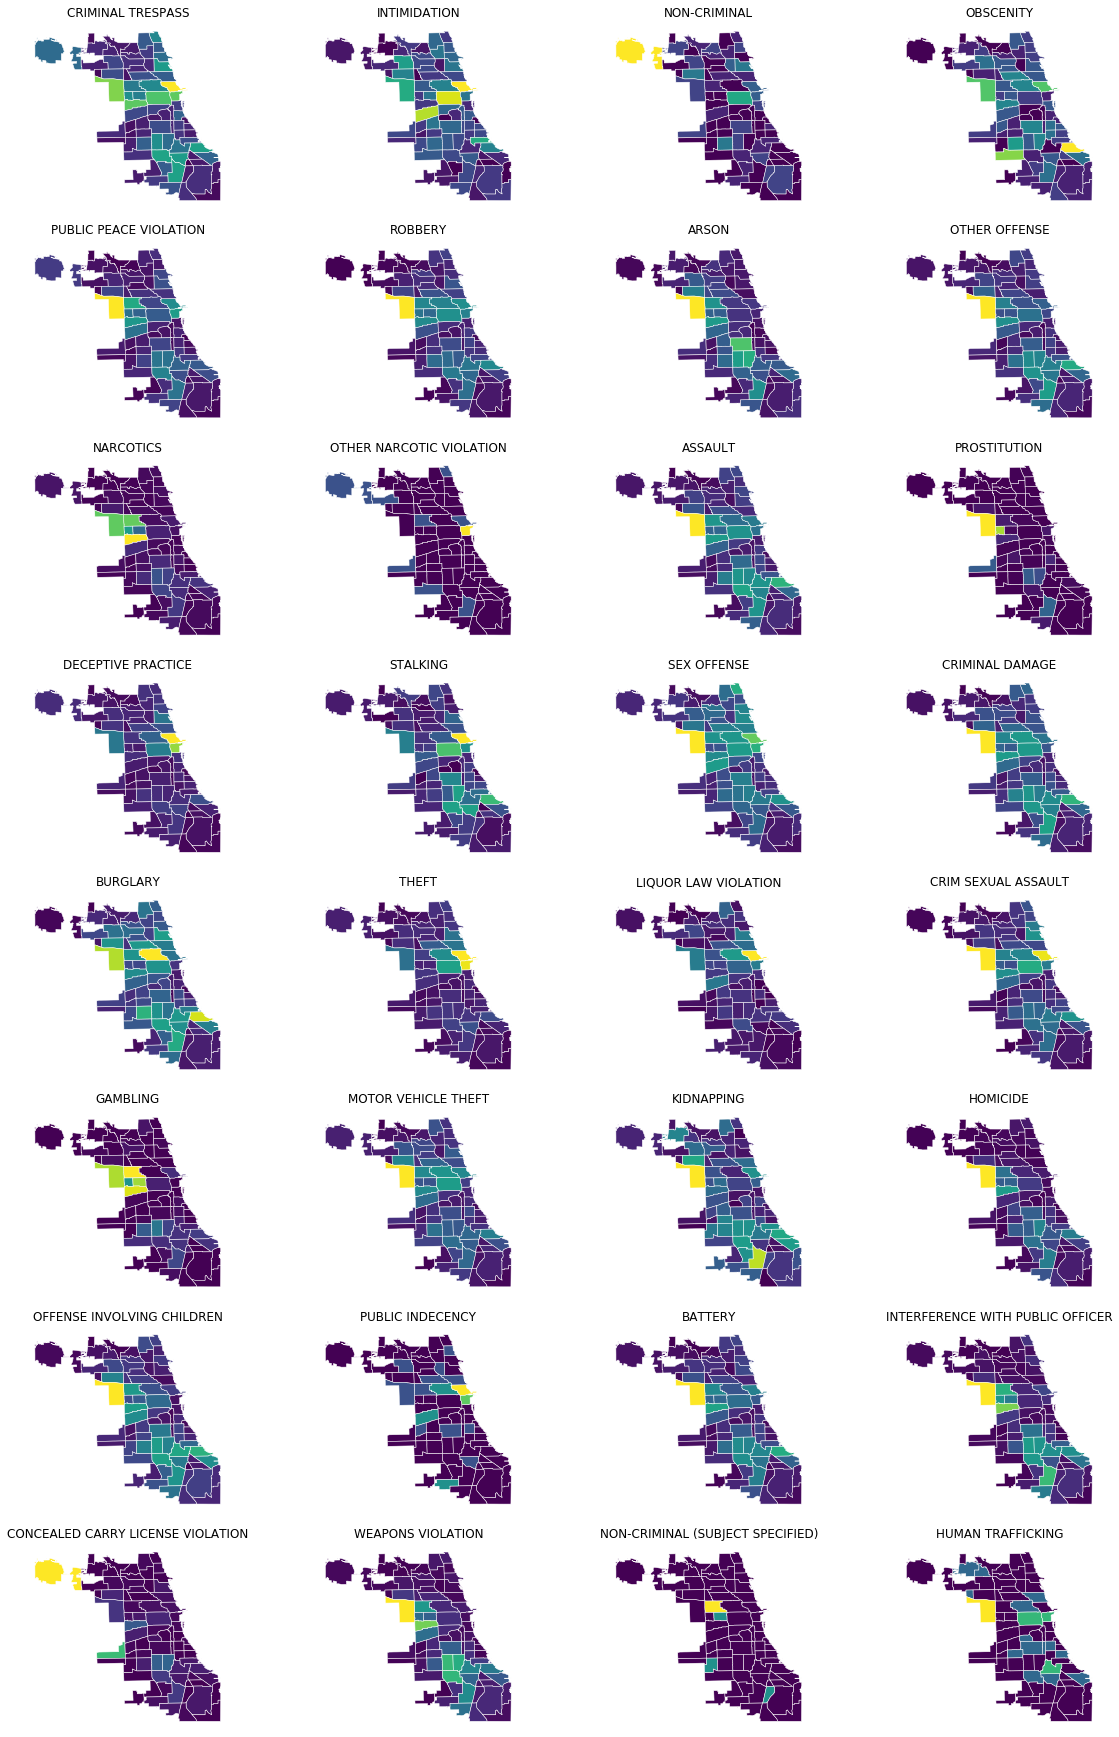

In [11]:
# Small multiples code adapted from https://joelotz.github.io/small-multiples-in-matplotlib.html
# Also looked at https://python-graph-gallery.com/125-small-multiples-for-line-chart/

# Reshape data to community_area-level
crimes_by_area_cat = crime_df \
    .groupby(['community_area', 'primary_type']) \
    .size() \
    .reset_index() \
    .pivot(index='community_area', columns='primary_type', values=0) \
    .reset_index() \
    .fillna(0)

# change ID for community_area from float to int to string for merging
crimes_by_area_cat.community_area = crimes_by_area_cat.community_area.astype(int).astype(str)

# merge and save as new GeoDataFrame
crime_by_cat_gdf = chicago_gdf.merge(crimes_by_area_cat,
                                     how='inner',
                                     left_on='area_num_1', right_on='community_area')

########################
# SMALL MULTIPLES PLOT #
########################

# Get unique list of categories and length 
categories = list(set(crime_df.primary_type))
num_plots = len(categories)

# Set up empty figure with 32 subplots for 32 crime categories
FIG_WIDTH, FIG_HEIGHT = 16, 24
NUM_ROWS, NUM_COLS = 8, 4
fig = plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
axes = [plt.subplot(NUM_ROWS, NUM_COLS, i) for i in range(1, num_plots + 1)]

# Tweak layout and spacing
plt.tight_layout(pad=0, w_pad=1, h_pad=1)

for i in range(num_plots):
    # plot different category to each subplot
    ax = axes[i]
    plot_dataframe(crime_by_cat_gdf,
                   column=categories[i],
                   ax=ax,
                   edgecolor='white',
                   linewidth=0.5)
    
    # Remove top and right axes and ticks
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    
    # Display crime category
    ax.set_title(categories[i])

## Problem 2: Data Augmentation and APIs

Since we are dealing with highly granular data, I've chosen to use data from the Census 5-year estimates from 2017. The demographic data is available down to the block group level, while crime data is available at precise coordinates, so aggregating both at the block level should be an adequate compromise.

The strategy I'll follow is:
1. Get block-level GeoJSON from the Chicago Data Portal to use as a base
2. Use a spatial join to aggregate crime reports at the block level
3. Get block group-level demographic data from the ACS Census API
4. Use an attribute join to augment the block-level data with block group-level race, income, and household size data from the Census.

In [12]:
# 1. Import Chicago block-level shapefile
# https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Census-Blocks-2010/mfzt-js4n

BLOCK_GJSON = "data/Boundaries - Census Blocks - 2010.geojson"
block_gdf = gpd.read_file(BLOCK_GJSON)
block_gdf = block_gdf[['geoid10', 'geometry']] # keep only important data
block_gdf.head()

# TODO: replace with API call

,geoid10,geometry
0,170316903002010,(POLYGON ((-87.62906799941059 41.7690860000715...
1,170316809003007,(POLYGON ((-87.6341179992764 41.77446599958471...
2,170316809003013,(POLYGON ((-87.63485400018324 41.7726330002261...
3,170312909004019,(POLYGON ((-87.73841099998789 41.8591310003707...
4,170312925004016,(POLYGON ((-87.73217300001724 41.8547640004652...


In [13]:
# 2. Spatial join block GEOIDs onto crimes, then aggregate counts

# Convert crime_df with lat/long to GeoDataFrame
# Adapted from https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html
crime_df['coordinates'] = list(zip(crime_df.longitude, crime_df.latitude))
crime_df['coordinates'] = crime_df['coordinates'].apply(shapely.geometry.Point)
crime_gdf = gpd.GeoDataFrame(crime_df, geometry='coordinates')

# filter out crimes with no location
crime_gdf = crime_gdf.dropna(subset=['latitude', 'longitude'])

# make sure both geodataframes have the same projection
crime_gdf.crs = {'init' :'epsg:4326'}
block_gdf.crs = {'init' :'epsg:4326'}

# spatial join block GEOID onto crime data 
crime_gdf = gpd.sjoin(crime_gdf, block_gdf,
                      how='inner',
                      op='intersects')

# Extract block group GEOID from block GEOID
crime_gdf['geoid'] = crime_gdf['geoid10'].str[0:12]

# Aggregate counts by block, and keep only crimes of interest 
crime_by_block = crime_gdf \
    .groupby(['geoid10', 'primary_type']) \
    .size() \
    .reset_index() \
    .rename({0: 'count', 'geoid10': 'block'}, axis=1) \
    .pivot(index='block', columns='primary_type', values='count') \
    [['BATTERY', 'HOMICIDE', 'DECEPTIVE PRACTICE', 'SEX OFFENSE']] \
    .reset_index()

# Check that data is formatted properly
crime_by_block.head()

primary_type,block,BATTERY,HOMICIDE,DECEPTIVE PRACTICE,SEX OFFENSE
0,170310101001000,NaN,NaN,1.0,NaN
1,170310101001001,2.0,NaN,1.0,NaN
2,170310101001002,NaN,NaN,NaN,NaN
3,170310101001003,19.0,1.0,6.0,NaN
4,170310101002000,2.0,NaN,3.0,NaN


In [14]:
# 3. Get census data for Cook County
# ACS 5-year estimates have data at the block-group level

# define query to census API
# unique census key is stored in environmental variable 
CENSUS_URL = 'https://api.census.gov/data/2017/acs/acs5'
CENSUS_KEY = %env CENSUS_KEY
DATA_VARS = ['B02001_001E', 'B02001_002E', 'B02001_003E', 'B02001_005E', # race vars
             'B19013_001E',  # income var
             'B11016_001E', 'B11016_002E', 'B11016_009E'] # household size vars
QUERY_PARAMS = {
    'get': ','.join(DATA_VARS),
    'for': 'block group:*',
    'in': 'state:17+county:031+tract:*',
    'key': CENSUS_KEY
}

# Query
census_data = requests.get(CENSUS_URL, params=QUERY_PARAMS)

if not census_data:
    print(f"Query failed with status code {census_data.status_code}")
else:
    census_df = pd.DataFrame.from_records(census_data.json())
    
    # Use first row as headers
    census_df.columns = census_df.iloc[0]
    census_df = census_df[1:]
    
    # Rename columns from census codes
    census_df = census_df.rename({
        'B02001_001E': 'pop_total', 
        'B02001_002E': 'pop_white', 
        'B02001_003E': 'pop_black', 
        'B02001_005E': 'pop_asian', 
        'B19013_001E': 'hh_income', # median household income in last 12 months 
        'B11016_001E': 'hh_total',
        'B11016_002E': 'hh_family', 
        'B11016_009E': 'hh_nonfamily'
    }, axis='columns')
    
    # Combine state, county, tract, and block group IDs into GEOID
    census_df['geoid'] = census_df['state'] + census_df['county'] \
                         + census_df['tract'] + census_df['block group']
    
    census_df = census_df.drop(labels=['state', 'county', 'tract', 'block group'],
                               axis='columns')
    
# Check that data is formatted properly
census_df.head()

,pop_total,pop_white,pop_black,pop_asian,hh_income,hh_total,hh_family,hh_nonfamily,geoid
1,600,11,589,0,21500,194,109,85,170312519001
2,1546,78,1376,0,32143,402,272,130,170312519002
3,1341,977,23,8,57000,448,313,135,170318211011
4,1356,1023,48,55,65699,357,288,69,170318211013
5,616,616,0,0,97656,269,173,96,170318211012


In [15]:
# 4. Merge Census data onto crime data

# Extract block group GEOID from block GEOID, then merge
crime_by_block['block_group'] = crime_by_block['block'].str[0:12]
crime_data = crime_by_block.merge(census_df,
                                  how='left',
                                  left_on='block_group', right_on='geoid')

# Clean up extraneous columns
crime_data = crime_data \
    .drop(labels=['geoid'], axis=1) \
    .set_index(keys=['block_group', 'block'])

# Check that data is formatted properly
crime_data.head()

BATTERY  HOMICIDE  DECEPTIVE PRACTICE  \
block_group  block                                                    
170310101001 170310101001000      NaN       NaN                 1.0   
             170310101001001      2.0       NaN                 1.0   
             170310101001002      NaN       NaN                 NaN   
             170310101001003     19.0       1.0                 6.0   
170310101002 170310101002000      2.0       NaN                 3.0   

                              SEX OFFENSE pop_total pop_white pop_black  \
block_group  block                                                        
170310101001 170310101001000          NaN       594       317       180   
             170310101001001          NaN       594       317       180   
             170310101001002          NaN       594       317       180   
             170310101001003          NaN       594       317       180   
170310101002 170310101002000          NaN      2170       809      1292   

                             pop_asian   hh_income hh_total hh_family  \
block_group  block                                                      
170310101001 170310101001000         0  -666666666      284       125   
             170310101001001         0  -666666666      284       125   
             170310101001002         0  -666666666      284       125   
             170310101001003         0  -666666666      284       125   
170310101002 170310101002000        13       20716      939       430   

                             hh_nonfamily  
block_group  block                         
170310101001 170310101001000          159  
             170310101001001          159  
             170310101001002          159  
             170310101001003          159  
170310101002 170310101002000          509

In [16]:
# Bonus! Some data cleaning and preprocessing.

# Convert all census fields from str to int
for i in ('pop_total', 'pop_white', 'pop_black', 'pop_asian',
          'hh_income', 'hh_total', 'hh_family', 'hh_nonfamily'):
    crime_data[i] = pd.to_numeric(crime_data[i])

# Replace missing vals in hh_income coded as -66666666 with NaN
crime_data['hh_income'].replace(to_replace=-666666666,
                                value=np.nan,
                                inplace=True)

# Calculate the racial majority for each block
def get_majority(series):
    other = series.pop_total - series.pop_white - series.pop_black - series.pop_asian
    
    if max(series.pop_white, series.pop_black, series.pop_asian, other) == series.pop_white:
        return 'white'
    elif max(series.pop_white, series.pop_black, series.pop_asian, other) == series.pop_black:
        return 'black'
    elif max(series.pop_white, series.pop_black, series.pop_asian, other) == series.pop_asian:
        return 'asian'
    else:
        return 'other'

crime_data['majority_race'] = crime_data.apply(get_majority,
                                               axis='columns')

crime_data.drop(labels=['pop_total', 'pop_white', 'pop_black', 'pop_asian'],
                axis='columns',
                inplace=True)
# crime_data['pct_white'] = crime_data['pop_white'] / crime_data['pop_total']
# crime_data['pct_black'] = crime_data['pop_black'] / crime_data['pop_total']
# crime_data['pct_asian'] = crime_data['pop_asian'] / crime_data['pop_total']
# crime_data.drop(labels=['pop_total', 'pop_white', 'pop_black', 'pop_asian'],
#                     axis='columns',
#                     inplace=True)

# Calculate percentage of block households that are family households
crime_data['pct_family'] = crime_data['hh_family'] / crime_data['hh_total']
crime_data.drop(labels=['hh_total', 'hh_family', 'hh_nonfamily'],
                    axis='columns',
                    inplace=True)

### 2.1 What types of blocks have reports of "Battery"?

Here, we characterize blocks by three categories: race, income, and household size. 

In [17]:
battery_only = crime_data.loc[crime_data['BATTERY'] > 0]

battery_only.describe()

,BATTERY,HOMICIDE,DECEPTIVE PRACTICE,SEX OFFENSE,hh_income,pct_family
count,23804.000000,988.000000,10835.000000,1497.000000,22652.000000,23761.000000
mean,4.142875,1.124494,2.758837,1.162993,49663.602684,0.604822
std,5.823003,0.399705,6.555474,0.535023,28723.652141,0.176660
min,1.000000,1.000000,1.000000,1.000000,6286.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,30357.000000,0.480243
50%,2.000000,1.000000,1.000000,1.000000,41778.000000,0.629482
75%,5.000000,1.000000,2.000000,1.000000,61218.000000,0.740157
max,195.000000,5.000000,246.000000,7.000000,211071.000000,1.000000


In [18]:
battery_only \
    .groupby('majority_race') \
    .size()

majority_race
asian      229
black    11656
other     1750
white    10169
dtype: int64

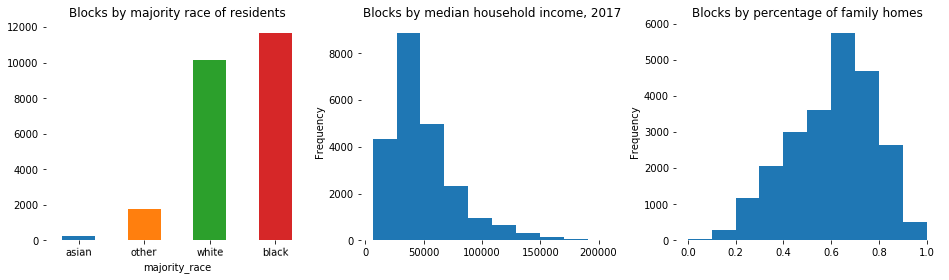

In [19]:
# Setup plot
FIG_WIDTH, FIG_HEIGHT = 16, 4
fig = plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
axes = [plt.subplot(1, 3, i) for i in range(1, 4)]

# Plot distribution of majority race for each block
battery_only \
    .groupby('majority_race') \
    .size() \
    .sort_values() \
    .plot(kind='bar',
          ax=axes[0],
          title='Blocks by majority race of residents',
          rot=1)

# Plot distribution of hh_income
battery_only.plot(kind='hist',
                  y='hh_income',
                  legend=False,
                  ax=axes[1],
                  title='Blocks by median household income, 2017')

# Plot distribution of pct_family
battery_only.plot(kind='hist',
                  y='pct_family',
                  legend=False, 
                  ax=axes[2],
                  title='Blocks by percentage of family homes')

# Remove bounding boxes
for i in range(3):
    ax = axes[i]
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

- Blocks with reports of Battery are slightly more likely to have black resident majority than a white resident majority. 49% of blocks with reports of Battery are majority-black, while 43% are majority-white.
- The median block with reports of Battery has a median household income of \\$41,778 and mean of \\$49,663 in 2017.
- The median block with reports of Battery is 62.9% family homes (vs. nonfamily homes).

### 2.2 What types of blocks get "Homicide"?

In [20]:
homicide_only = crime_data.loc[crime_data['HOMICIDE'] > 0]

homicide_only.describe()

,BATTERY,HOMICIDE,DECEPTIVE PRACTICE,SEX OFFENSE,hh_income,pct_family
count,988.000000,1124.000000,608.000000,89.000000,1048.000000,1122.000000
mean,9.008097,1.122776,2.777961,1.179775,36111.396947,0.621233
std,10.467198,0.397070,4.503893,0.512609,19299.935852,0.159314
min,1.000000,1.000000,1.000000,1.000000,6286.000000,0.079408
25%,3.000000,1.000000,1.000000,1.000000,23438.000000,0.515670
50%,6.000000,1.000000,2.000000,1.000000,31734.500000,0.629375
75%,11.000000,1.000000,3.000000,1.000000,41979.000000,0.735409
max,92.000000,5.000000,56.000000,4.000000,171429.000000,1.000000


In [21]:
homicide_only \
    .groupby('majority_race') \
    .size()

majority_race
asian      1
black    871
other     71
white    181
dtype: int64

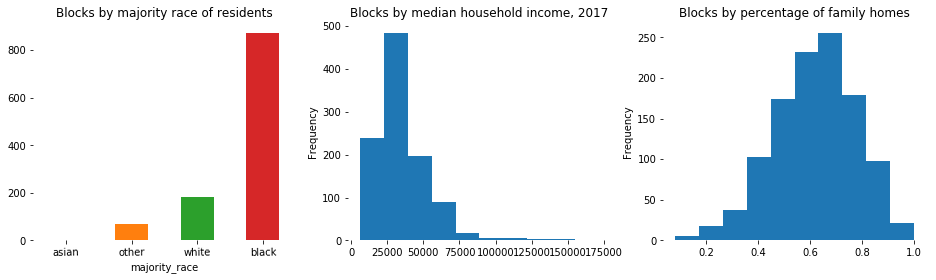

In [22]:
# Setup plot
FIG_WIDTH, FIG_HEIGHT = 16, 4
fig = plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
axes = [plt.subplot(1, 3, i) for i in range(1, 4)]

# Plot distribution of majority race for each block
homicide_only \
    .groupby('majority_race') \
    .size() \
    .sort_values() \
    .plot(kind='bar',
          ax=axes[0],
          title='Blocks by majority race of residents',
          rot=1)

# Plot distribution of hh_income
homicide_only.plot(kind='hist',
                  y='hh_income',
                  legend=False,
                  ax=axes[1],
                  title='Blocks by median household income, 2017')

# Plot distribution of pct_family
homicide_only.plot(kind='hist',
                  y='pct_family',
                  legend=False, 
                  ax=axes[2],
                  title='Blocks by percentage of family homes')

# Remove bounding boxes
for i in range(3):
    ax = axes[i]
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

- Blocks with reports of Homicide predominantly have black-majority residents. 88% of blocks with reports of Homicide are majority-black, while only 18% are majority-white.
- The median block with reports of Homicide has a median household income of \\$31,734 and mean of \\$36,111 in 2017.
- The median block with reports of Homicide is 62.9% family homes (vs. nonfamily homes).

### 2.3 Does that change over time in the data you collected?

Given that we are comparing metrics drawn from 5-year estimates by the Census Bureau, this data is unlikely to change between 2017 and 2018.

### 2.4 What is the difference in blocks that get “Deceptive Practice” vs “Sex Offense”?

In [23]:
deceptive_practice = crime_data.loc[crime_data['DECEPTIVE PRACTICE'] > 0]
sex_offense = crime_data.loc[crime_data['SEX OFFENSE'] > 0]

deceptive_practice.describe()

,BATTERY,HOMICIDE,DECEPTIVE PRACTICE,SEX OFFENSE,hh_income,pct_family
count,10835.000000,608.000000,14892.000000,1045.000000,14245.000000,14859.000000
mean,5.691186,1.134868,2.385308,1.192344,57744.530011,0.578016
std,7.615777,0.419737,5.648949,0.587496,33758.522202,0.184191
min,1.000000,1.000000,1.000000,1.000000,6286.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,32625.000000,0.440909
50%,3.000000,1.000000,1.000000,1.000000,48788.000000,0.603834
75%,7.000000,1.000000,2.000000,1.000000,74432.000000,0.717472
max,195.000000,5.000000,246.000000,7.000000,211071.000000,1.000000


In [24]:
sex_offense.describe()

,BATTERY,HOMICIDE,DECEPTIVE PRACTICE,SEX OFFENSE,hh_income,pct_family
count,1497.000000,89.000000,1045.000000,1746.000000,1661.000000,1738.000000
mean,9.666667,1.213483,5.291866,1.143757,52650.950030,0.564042
std,12.387209,0.573504,13.752324,0.502667,31982.335491,0.194061
min,1.000000,1.000000,1.000000,1.000000,6286.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,30341.000000,0.408287
50%,5.000000,1.000000,2.000000,1.000000,43173.000000,0.590786
75%,12.000000,1.000000,5.000000,1.000000,67885.000000,0.715359
max,195.000000,5.000000,246.000000,7.000000,189286.000000,1.000000


In [25]:
deceptive_practice \
    .groupby('majority_race') \
    .size()

majority_race
asian     160
black    6206
other     854
white    7672
dtype: int64

In [26]:
sex_offense \
    .groupby('majority_race') \
    .size()

majority_race
asian     21
black    711
other    121
white    893
dtype: int64

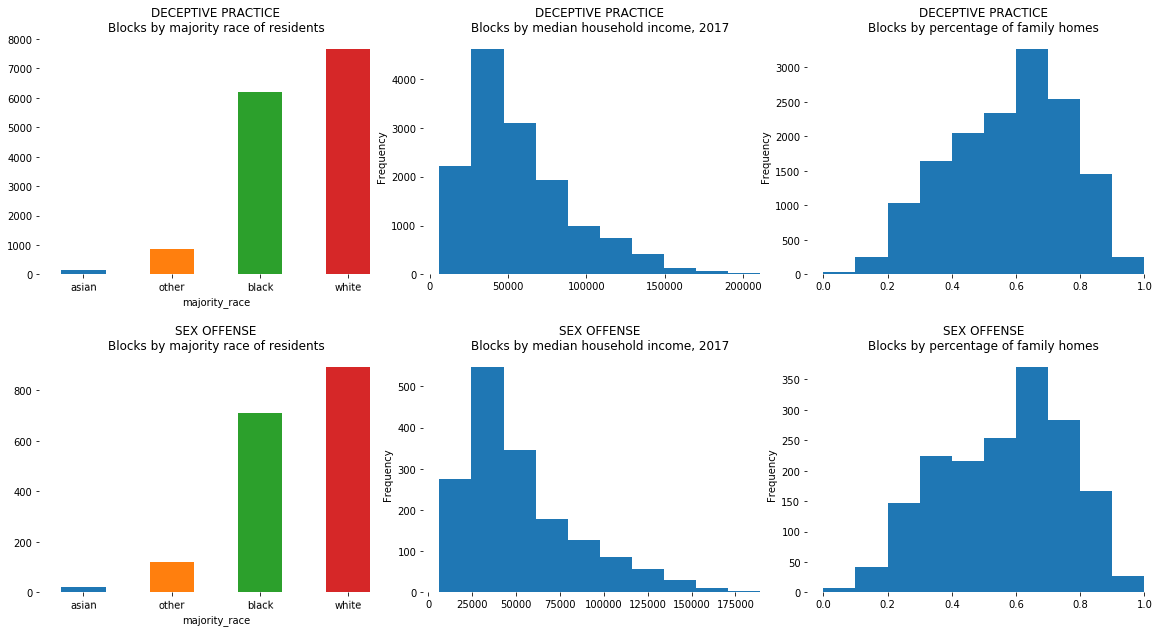

In [27]:
# Setup plot
FIG_WIDTH, FIG_HEIGHT = 16, 8
fig = plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
axes = [plt.subplot(2, 3, i) for i in range(1, 7)]
plt.tight_layout(pad=0, w_pad=0, h_pad=6)

# Deceptive practice descriptive plots
deceptive_practice \
    .groupby('majority_race') \
    .size() \
    .sort_values() \
    .plot(kind='bar', ax=axes[0], title='DECEPTIVE PRACTICE\nBlocks by majority race of residents', rot=1)
deceptive_practice.plot(kind='hist', y='hh_income', legend=False, ax=axes[1], 
                        title='DECEPTIVE PRACTICE\nBlocks by median household income, 2017')
deceptive_practice.plot(kind='hist', y='pct_family', legend=False, ax=axes[2], 
                        title='DECEPTIVE PRACTICE\nBlocks by percentage of family homes')

# Sex offense descriptive plots
sex_offense \
    .groupby('majority_race') \
    .size() \
    .sort_values() \
    .plot(kind='bar', ax=axes[3], title='SEX OFFENSE\nBlocks by majority race of residents', rot=1)
sex_offense.plot(kind='hist', y='hh_income', legend=False, ax=axes[4], 
                 title='SEX OFFENSE\nBlocks by median household income, 2017')
sex_offense.plot(kind='hist', y='pct_family', legend=False, ax=axes[5], 
                 title='SEX OFFENSE\nBlocks by percentage of family homes')

# Remove bounding boxes
for i in range(6):
    ax = axes[i]
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

It appears that blocks with Sex Offenses are far rarer than blocks with Deceptive Practice (1,746 vs. 14,892 blocks respectively). Otherwise, the two sets of blocks seem fairly similar - at least on our chosen set of descriptive metrics.

Blocks with... | Deceptive Practice | Sex Offense
--- | --- | --- 
Pct majority asian (%) | 1.1 | 1.2
Pct majority black (%) | 41.7 | 40.7
Pct majority other (%) | 5.7 | 6.9
Pct majority white (%) | 51.5 | 51.1
Mean household income (\\$) | 57,745 | 52,651
Median household income (\\$) | 48,788 | 43,173
Mean pct family homes (%) | 57.8 | 56.4
Median pct family homes (%) | 60.3 | 59.1

## Problem 3: Analysis & Communication

### 3.1 Describe how crime has changed in Chicago from 2017 to 2018

Overall, reported crime in Chicago stayed fairly stable between 2017 and 2018, falling slightly by 0.7%  

Metric | 2017 | 2018 | Pct change (%)
--- | --- | --- | ---
Number of Reported Crimes | 268,088 | 266,206 | -0.7%

The three most common categories of reported crime were "Theft", "Battery", and "Criminal Damage", whereas the three least common categories of reported crime were "Non-Criminal (Subject Specified)", "Other Narcotic Violation", and "Human Trafficking"

Category | 2017 | 2018 | Total
--- | --- | --- | ---
Theft | 64,344 | 65,073 | 129,417
Battery | 49,214 | 49,781 | 98,995
Criminal Damage | 27,805 | 29,042 | 56, 847
... | ... | ... | ...
Human Trafficking | 9 | 14 | 23 
Other Narcotic Violation | 11 | 1 |12
Non-Criminal (Subject Specified) | 2 | 3 |5

The categories of crime that saw the largest year-on-year growth were "Concealed Carry License Violation", "Human Trafficking", and "Non-Criminal (Subject Specified)", whereas the categories that saw the largest year-on-year decreases were "Other Narcotic Violation", "Robbery", and "Arson". It should be noted that some categories with large percentage increases/decreases have very small absolute changes.

Category | 2017 | 2018 | Percent Change
--- | --- | --- | ---
Concealed Carry License Violation | 69 | 149 | 115.9%
Human Trafficking | 9 | 14 | 55.6%
Non-Criminal (Subject Specified) | 2 | 3 | 50%
... | ... | ... | ...
Arson | 444 | 372 | -16.2%
Robbery | 11877 | 9863 | -18.5%
Other Narcotic Violation | 11 | 1 | -90.9%


### 3.2 One of the alderman candidates from recent elections has some crime statistics on his website: https://www.ringer4results.com/node/8

According to the website:

_"Crime is a major issue in our neighborhoods over the last four years, and the data shows just that._

_Let’s break down the Chicago Police Department’s report for the month leading up to July 26, 2018, compared to the same week in 2017:_
- _Robberies -- up 21 percent over the same time-frame in 2017_
- _Aggravated batteries -- up 136 percent_
- _Burglaries -- an increase of 50 percent_
- _Motor vehicle theft -- up 41 percent."_

#### 3.2A Are these statistics correct?

These statistics refer specifically to "crime in the 43rd ward", so we'll only include crime reports from that ward. We'll assume that "week" is a typo and compare changes in crime reports from July 1-26, 2018 to July 1-26, 2017.

In [28]:
# Where does the 43rd ward rank in terms of crime in Chicago?
crime_df \
    .groupby('ward') \
    .size() \
    .sort_values() \
    .reset_index()

,ward,0
0,19.0,4470
1,39.0,5162
2,33.0,5220
3,36.0,5314
4,38.0,5329
5,48.0,5341
6,47.0,5438
7,45.0,5546
8,50.0,5738
9,40.0,5754


In [29]:
# Parse dates and extract month, day
crime_df['date'] = pd.to_datetime(crime_df['date'], yearfirst=True)
crime_df['month'] = pd.DatetimeIndex(crime_df['date']).month
crime_df['dayinmonth'] = pd.DatetimeIndex(crime_df['date']).day

# Filter data to specified variables
ward_43_df = crime_df \
    .loc[crime_df['ward'] == 43] \
    .loc[crime_df['month'] == 7] \
    .loc[crime_df['dayinmonth'] <= 26] \
    .groupby(['primary_type', 'year']) \
    .size() \
    .pct_change() \
    .reset_index()

# Which categories of crimes have increased/decreased year on year?
ward_43_change_df = ward_43_df \
    .loc[ward_43_df['year'] == 2018] \
    .drop(labels='year', axis=1) \
    .rename({0: 'pct_change'}, axis=1) \
    .sort_values(by='pct_change', ascending=False)

ward_43_change_df

,primary_type,pct_change
24,OTHER OFFENSE,2.250000
1,ASSAULT,2.000000
10,CRIMINAL TRESPASS,1.285714
17,MOTOR VEHICLE THEFT,0.666667
32,THEFT,0.130719
8,CRIMINAL DAMAGE,0.041667
12,DECEPTIVE PRACTICE,0.033333
5,BURGLARY,0.000000
15,LIQUOR LAW VIOLATION,0.000000
19,NARCOTICS,0.000000


The 43rd ward is ranked #26 out of 50 wards in terms of volume of crime reports (where #1 has the lowest volume of reported crimes).

It appears that the four provided statistics given are incorrect:
- Robberies decreased by 46.7% (and did not increase by 21%)
- Aggravated batteries decreased by 53.3% (and did not increase by 136%)
- Burglaries did not change (and did not increase by 50%)
- Motor vehicle theft did, however, increase by 66.7% (rather than 41% as reported)

The next set of claims:

_"All told, crime rose 16 percent in the same 28-day time period in just one year. But take a look at the year-to-date number and you’ll see how crime has affected our local neighborhoods in a four-year period:_
- _Rose 10 percent since 2017_
- _Rose 22 percent since 2016"_

We'll again assume here that the "28-day time period" is a typo and focus on July 1-26 for both years. We don't have 2016 data, so we'll only evaluate the claims that year-to-date crime rose 10% since 2017.

In [30]:
# Did crime rise by 16% year on year?
crime_df \
    .loc[crime_df['ward'] == 43] \
    .loc[crime_df['month'] == 7] \
    .loc[crime_df['dayinmonth'] <= 26] \
    .loc[crime_df['primary_type'].isin(['ROBBERY', 'BATTERY', 'BURGLARY', 'MOTOR VEHICLE THEFT'])] \
    .groupby(['year']) \
    .size() \
    .pct_change()

year
2017         NaN
2018   -0.150685
dtype: float64

In [31]:
# Did year-to-date crime rise 10% since 2017? 
crime_df \
    .loc[crime_df['ward'] == 43] \
    .loc[((crime_df['year'] == 2018) & (crime_df['date'] <= pd.to_datetime("2018-07-26"))) |
         ((crime_df['year'] == 2017) & (crime_df['date'] <= pd.to_datetime("2017-07-26")))] \
    .groupby(['year']) \
    .size() \
    .pct_change()

year
2017         NaN
2018    0.098231
dtype: float64

While crime in the same 26-day period (July 1 to 26) actually decreased by 15% between 2017 and 2018, total crime did in fact increase year-to-date by 9.8% (approx 10%) in the 43rd ward.

#### 3.2B Could they be misleading or would you agree with the conclusions he’s drawing? Why or why not?

In [32]:
ward_43_change_df

,primary_type,pct_change
24,OTHER OFFENSE,2.250000
1,ASSAULT,2.000000
10,CRIMINAL TRESPASS,1.285714
17,MOTOR VEHICLE THEFT,0.666667
32,THEFT,0.130719
8,CRIMINAL DAMAGE,0.041667
12,DECEPTIVE PRACTICE,0.033333
5,BURGLARY,0.000000
15,LIQUOR LAW VIOLATION,0.000000
19,NARCOTICS,0.000000


While crime is indeed an issue in the 43rd ward, its relative placement as #26 out of 50 wards in terms of the total number of reported crimes makes it effectively the median ward for crime in the Chicago context.

Given that the sign or magnitude of most of the statistics reported are factually incorrect, I would definitely characterize his statements as misleading. Further, I would question his use of crime statistics specifically from July, a summer month. Crimes that occur outside are more likely to increase during the warmer months. Using year-to-date data helps mitigate this in part, but not fully. Thus, reporting statistics only from July is hardly representative of crime in Chicago.

If anything, given the table above (which shows percentage changes for various categories of crime in the 43rd ward), the composition of crime is changing in the neighborhood: violent crimes like battery, robbery, and weapons violations have decreased from 2017, whereas nonviolent crimes like criminal trespass and thefts have increased. Assault is the clear exception to this statement, having grown by 200% year-on-year.

### 3.3 As you know, there will be a new mayor in Chicago very soon. Based on these summary statistics, provide 5 key findings to the new mayor’s office about crime in Chicago and what they should focus on in order to deal with crime in Chicago.

Key findings and recommendations:

1. Overall, reported crime in Chicago stayed fairly stable between 2017 and 2018, falling slightly by 0.7%  While overall crime did not grow year-to-year, this merits a closer look at the efficacy of crime-reduction policies that were implemented in 2017.

2. The three most common categories of reported crime overall were "Theft", "Battery", and "Criminal Damage". This suggests that new law enforcement policy in 2019 should incorporate elements targeted at these specific crimes.

3. Certain categories of crime are more likely to be reported in particular neighborhoods. For example, theft - the most commonly reported crime - is reported most often in the Near North Side, whereas narcotics-related offenses are reported most often in North Lawndale and the Loop. Incorporating specialized training for officers based on the location of their post and vice versa (strategically deploying officers on certain beats to particular areas) may be useful. 

4. Blocks with reports of Homicides were more likely to be predominantly black and have a large proportion of low-income households. Research has suggested that deploying police officers that are the same race as the communities they serve has beneficial effects; the composition of police officers working on homicide beats can be adjusted accordingly. 

5. The category of crime that saw the largest year-on-year growth was "Concealed Carry License Violation", which primarily occured in the O'Hare area (presumably at the airport). This suggests that police officers and other law enforcement (e.g. TSA) at O'Hare should implement additional detection measures to address these violations. Further, additional research should be conducted to explore if such violations are likely to be intentional or unintentional - it is plausible, for instance, that the primary violators of concealed carry license laws in Chicago have flown in from states with less restrictive firearms laws. That would open up avenues for preventative measures to be put in place, for example, for firearm-bearing travelers at their point of origin.

### 3.4 What are some of the key caveats of your recommendations and limitations of the analysis that you just did?

One key caveat is that our analysis has been based on reported crime data, much of which is self-reported. Under-reporting of many kinds of crimes (e.g. assault, thefts, sex offenses especially) is a well-documented phenomenon. Unless we have a mechanism by which to tell what proportion of true crime is reported (which implies the ability to detect all "true" occurences of each crime), reported crime data is the best information we have to work with.

Further, police officers are also not uniformly spatially distributed within wards, community areas, etc. in Chicago. Since police officers are a common source of detecting and recording crime, we can expect that more crimes would be detected in neighborhoods with a larger police presence. Human error in recording crimes is a possible factor here as well.

## Problem 4: Probability

### 4.1 You get a call from someone at 2111 S Michigan Ave. Of the types of crimes you have data for, which crime type is the most likely given the call came from 2111 S Michigan Ave? What are the probabilities for each type of request?

In [33]:
# Get block GEOID of 2111 S Michigan Ave using Census Geocoder API
# https://www.census.gov/data/developers/data-sets/Geocoding-services.html

# Query setup
GEOCODER_URL = "https://geocoding.geo.census.gov/geocoder/geographies/address"
PARAMETERS = {
    'street': '2111 South Michigan Avenue',
    'city': 'Chicago',
    'state': 'IL',
    'zip': '60616',
    'benchmark': 'Public_AR_Current',
    'vintage': 'Current_Current',
    'format': 'json'
}

# Query and display block GEOID
geocoder = requests.get(GEOCODER_URL, params=PARAMETERS).json()
geocoder['result']['addressMatches'][0]['geographies']['2010 Census Blocks'][0]['GEOID']

'170313301004055'

In [34]:
crime_michigan_ave = crime_gdf.loc[crime_gdf['geoid10'] == '170313301004055'] \
    .groupby(['primary_type']) \
    .size() \
    .reset_index() \
    .rename({0: 'count'}, axis=1) \
    .sort_values(by='count', ascending=False)

crime_michigan_ave['pct_of_total'] = 100 * crime_michigan_ave['count'] / sum(crime_michigan_ave['count'])

crime_michigan_ave

,primary_type,count,pct_of_total
1,BATTERY,16,28.070175
7,OTHER OFFENSE,11,19.298246
0,ASSAULT,6,10.526316
3,CRIMINAL DAMAGE,6,10.526316
5,DECEPTIVE PRACTICE,6,10.526316
10,THEFT,6,10.526316
9,ROBBERY,2,3.508772
2,BURGLARY,1,1.754386
4,CRIMINAL TRESPASS,1,1.754386
6,MOTOR VEHICLE THEFT,1,1.754386


We only have data at the block-level, so we will have to consider data from the block in which 2111 S Michigan Ave is located at (with a GEOID of 170313301004055). On this block, Battery is the most likely crime being reported from this block (forming 28% of all crimes reported at this location). The individual probabilities of each type of crime are shown in the table above. 

### 4.2 Let’s now assume that a call comes in about Theft. Which is more likely – that the call came from Garfield Park or Uptown? How much more or less likely is it to be from Garfield Park vs Uptown?

In [35]:
# Garfield Park is community areas 26 and 27, while Uptown is community area 3. 
# Which has a higher percentage of theft reports?
crime_df.loc[crime_df['community_area'].isin([3, 26, 27])] \
    .loc[crime_df['primary_type'] == "THEFT"] \
    .groupby(['community_area']) \
    .size()

community_area
3.0     1954
26.0    1213
27.0    1281
dtype: int64

Here, I assume that "Uptown" and "Garfield Park" refer to the community areas with those names. Further, I assume that "Garfield Park" is the combination of two community areas, "East Garfield Park" and "West Garfield Park".

In our 2017-2018 crime data, there were 2,494 reports of theft in Garfield Park versus 1,954 reports of theft in Uptown. Thus, it's more likely (approx. 27.6% more likely) that the call was about Garfield Park.

### Now assume that you don’t have access to all the raw data and you know the following things: There are a total of 1000 calls, 600 from Garfield Park and 400 from Uptown. Of the 600 calls from Garfield Park, 100 of them are about Battery. Of the 400 calls from Uptown, 160 are about Battery. If a call comes about Battery, how much more/less likely is it that the call came from Garfield Park versus Uptown?

Let GP represent Garfield Park, UT represent Uptown. Then, using Bayes' Theorem:

$$
\begin{split}
P(GP|Battery) & = \frac{P(Battery|GP) \cdot P(GP)}{P(Battery|GP) \cdot P(GP) + P(Battery|UT) \cdot P(UT)} \\
& = \frac{\frac{100}{600} \cdot \frac{600}{1000}}{\frac{100}{600} \cdot \frac{600}{1000} + \frac{160}{400} \cdot \frac{400}{1000}} \\
& = \frac{0.1}{0.1 + 0.16} \\
& \approx 0.385
\end{split}
$$

There is a 38.5% probability that the call about Battery came from Garfield Park, versus a 61.5% probability that the call came from Uptown. Thus, a call about Battery is approx. 59.7% more likely to come from Garfield Park than from Uptown.